# Tensorflow

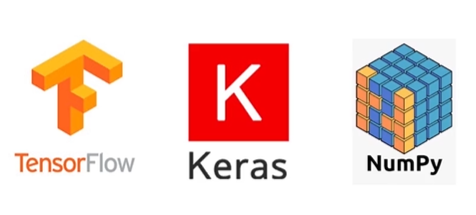

Biblioteca de aprendizado de máquina e ML para a utilização de redes neurais, com alternativa mais complexa, robusta e permitem a construção de uma rede com mais camadas ou mais opções. 

Pensado por uma divisão do Google Brain, pensada em computação numérica, como multiplicação de matrizes por vetores e manipular dados em forma de matriz.

Pensado em processar em CPUs, GPUs e dispositivos móveis. Sendo desenvolvido para apredizado de máquina, deep learning e computação numérica.

## Preparando o conjunto de dados

O keras era utilizado como o "Front-End" de outras bibliotecas de aprendizado de máquinha para facilitar o uso de biblioteca mais complexas. Hoje, o Keras é incorporado como Tensorflow.

Os dados utilizados são de uma base de dados de imagens de roupa com tamanho 28x28 e cerca de 70 mil imagens.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashio_minist = keras.datasets.fashion_mnist

A função *load_data()* já separa os dados entre um conjunto de  treino e teste com seus respectivos rotulos.

In [ ]:
#Separar os dados entre treino e teste
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Observar o tamanho dos dados
train_images.shape

In [ ]:
# Tamanho dos rotulos de treino
len(train_labels)

In [ ]:
# Com a biblioteca numpy ver todos os rotulos presentes (10 categorias diferentes)
np.unique(train_labels)

In [ ]:
#Verificar o tamanho dos testes 10000 imagens de 28x28
test_images.shape

In [ ]:
len(test_labels)

In [ ]:
# Verificar quais rotulso são de teste
test_labels

Como a base de dados se trata de pixels, eles possuiem uma imagem de 0 a 255. Nesse sentido, é interessante colocar os dados entre (0 a 1) para isso basta dividir as matrizes por 255. Isso é importante para impedir que dados que distoam dos demais não possam modificar draticamente o modelo.

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Construção do modelo de redes neurais artificiais

A construção será com base na biblioteca Keras e Tensoflow. O modelo será sequencial com o método *keras.Sequential*, ou seja, o resultado de uma camada vai para a próxima já que as camadas são sequêncial.  Será usado na primeira camada *keras.layers.Flatten()* e traduzindo a matriz 28x28 em um vetores de 28, já que esse modelo não trabalha com matrizes, atráves da concatenação as linhas das matrizes .

Para as duas camadas densas será utilizado o comando *keras.layers.Dense(128, activation=tf.nn.relu) e keras.layers.Dense(10, activation=tf.nn.softmax)*, na primeira a função de ativação é a ReLU e a outra camada com a função softmax com 10 neurônios de saida já que temos 10 rotulos/classes.

In [ ]:
# Construção da rede
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()#Quantos pesos tem na rede neural e a sua estrutura

O modelo será copilado atravez do método *.compile()* e possui três parametros: *optimizer* que é otimizador para os pesos, ou seja, a tecnica para a construção dos pesos; *loss* método de erro, utilanda a entrupoa cruzad categórica esparsa *sparse_categorical_crossentropy* é utilizada com valores proximos proximos de 0 e 1; e a metrica será acuracia.

In [ ]:
# Copilar o modelo da rede
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Para treinar o modelo é utilizado o parametro *epochs* que é as epocas de treinamento da rede, ou seja, cinco iterações dos nossos conjuntos de dados para construir o modelo. Dados mais complexos precisam de mais epocas.

In [ ]:
# Treino de modelo
model.fit(train_images, train_labels, epochs=5)

## Validando o modelo de rede neural

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
# Predição para cada imagem de teste
predictions = model.predict(test_images)
predictions[0]

In [ ]:
# Indice de maior predição
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
img = test_images[0]

print(img.shape)

In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)


In [ ]:
np.argmax(predictions_single[0])